# 911 Calls Exploratory Data Analysis

### Import numpy and pandas

In [1]:
import numpy as np
import pandas as pd

### Import visualization libraries and set %matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

### Reading the csv file as a dataframe 

In [56]:
df = pd.read_csv('911.csv')

### Check the info() of the df

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627057 entries, 0 to 627056
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        627057 non-null  float64
 1   lng        627057 non-null  float64
 2   desc       627057 non-null  object 
 3   zip        550638 non-null  float64
 4   title      627057 non-null  object 
 5   timeStamp  627057 non-null  object 
 6   twp        626788 non-null  object 
 7   addr       627057 non-null  object 
 8   e          627057 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 43.1+ MB


### Check the head of df

In [58]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1


## Basic Analysis

### What are the top 5 zipcodes for 911 calls?

In [59]:
df['zip'].value_counts().head(5)

19401.0    42731
19464.0    41266
19403.0    32831
19446.0    30429
19406.0    21301
Name: zip, dtype: int64

### What are the top 10 townships for the 911 calls?

In [60]:
df['twp'].value_counts().head(10)

LOWER MERION        52791
ABINGTON            37783
NORRISTOWN          35184
UPPER MERION        34307
CHELTENHAM          28916
POTTSTOWN           25651
UPPER MORELAND      21629
LOWER PROVIDENCE    21162
PLYMOUTH            18999
UPPER DUBLIN        17948
Name: twp, dtype: int64

### How many unique title codes are there?

In [61]:
df['title'].nunique()

147

## Features

### The title column has "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Create a new column called "Reason" that contains the string value

In [62]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

### What is the most common Reason for a 911 call based off of this new column?

In [63]:
df['Reason'].value_counts()

EMS        312615
Traffic    220573
Fire        93869
Name: Reason, dtype: int64

### Now use seaborn to create a countplot of 911 calls by Reason

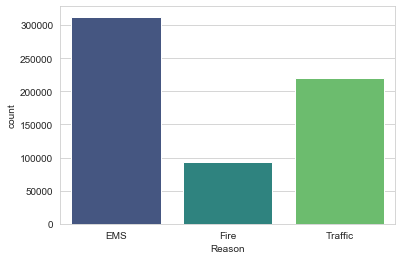

In [64]:
sns.countplot(x = 'Reason', data = df, palette = 'viridis')

### Data type of the objects in the timeStamp column?

In [65]:
type(df['timeStamp'].iloc[0])

str

### Convert str to datetime

In [66]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [67]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

### We use the .map() with this dictionary to map the actual string names to the day of the week

In [68]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [69]:
df['Day of Week'] = df['Day of Week'].map(dmap)

### We use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column

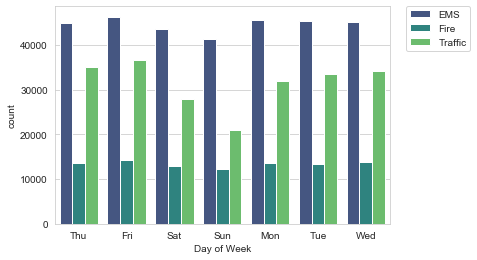

In [70]:
sns.countplot(x = 'Day of Week', data = df, hue = 'Reason', palette = 'viridis')

# To relocate the legend
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)

### Same  for Month

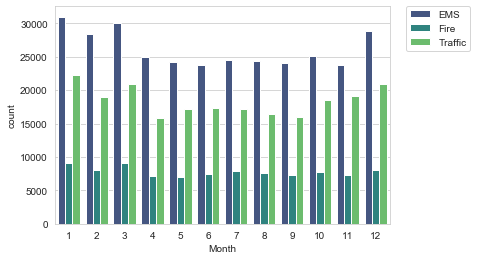

In [71]:
sns.countplot(x = 'Month', data = df, hue = 'Reason', palette = 'viridis')

# To relocate the legend
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)

### We create a gropuby object called byMonth, where we group the DataFrame by the month column and use the count() method for aggregation

In [73]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,48050,48050,48050,42233,48050,48050,48036,48050,48050,48050,48050,48050
5,48467,48467,48467,42257,48467,48467,48443,48467,48467,48467,48467,48467


### Now create a simple plot of the dataframe indicating the count of calls per month

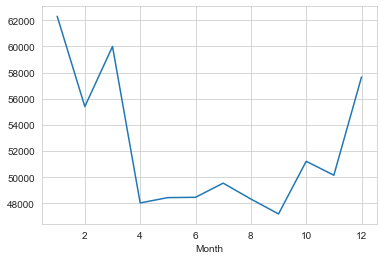

In [74]:
byMonth['twp'].plot()

### We can use seaborn's lmplot() to create a linear fit on the number of calls per month

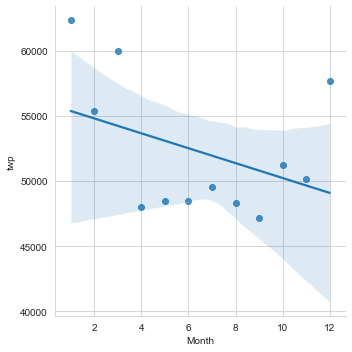

In [75]:
sns.lmplot(x = 'Month', y = 'twp', data = byMonth.reset_index())

In [76]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

### Groupby the Date column with the count() aggregate and create a plot of counts of 911 calls

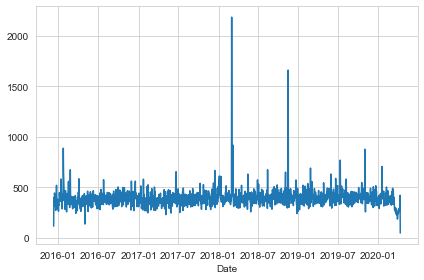

In [77]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

### We recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call

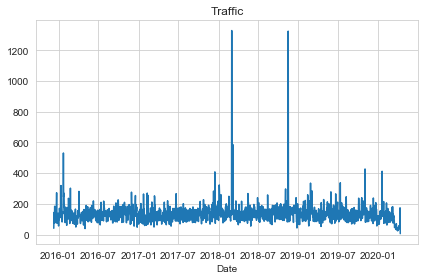

In [78]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

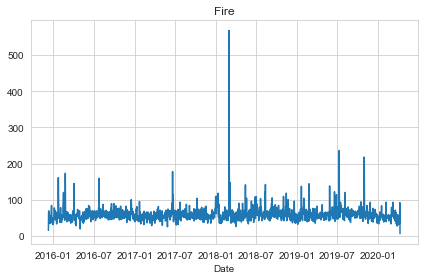

In [79]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

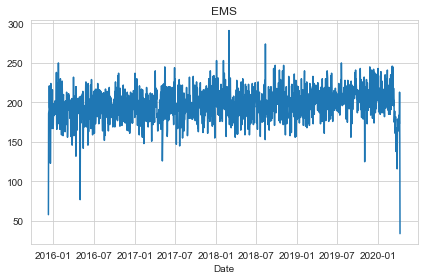

In [80]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

### We can create heatmaps with seaborn

In [81]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1861,1528,1362,1237,1237,1551,2554,3976,4811,4995,...,6033,6645,6708,6776,5355,4768,4112,3663,3224,2693
Mon,1771,1465,1283,1193,1257,1736,2557,4259,5294,5442,...,5339,5841,6013,6103,5158,4239,3562,3056,2501,1954
Sat,2301,1947,1801,1501,1366,1483,1773,2380,3286,4098,...,5117,4887,4905,4926,4722,4496,3913,3677,3037,2805
Sun,2299,2034,1835,1520,1390,1388,1647,2275,2859,3531,...,4447,4215,4276,4261,4149,3930,3520,2954,2458,2183
Thu,1619,1315,1331,1165,1195,1676,2684,4274,5105,5119,...,5752,6145,6044,6632,5237,4439,3871,3303,2688,2226


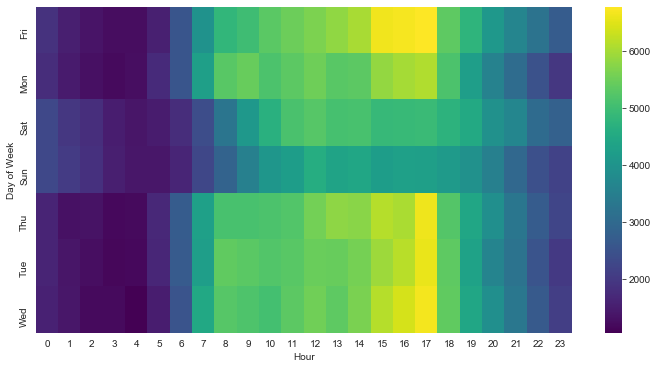

In [82]:
plt.figure(figsize = (12, 6))
sns.heatmap(dayHour,cmap = 'viridis')

### Clustermap using this DataFrame

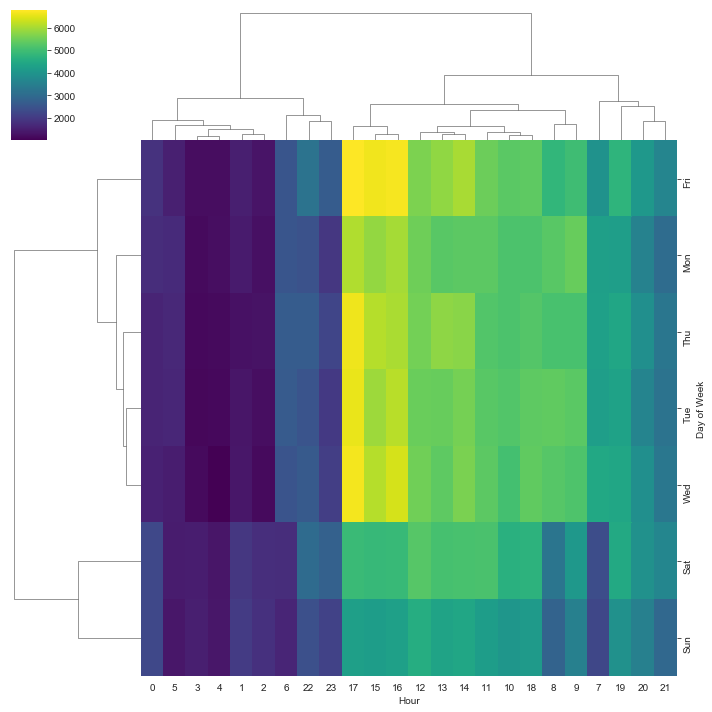

In [83]:
sns.clustermap(dayHour,cmap = 'viridis')

In [84]:
dayMonth = df.groupby(by = ['Day of Week', 'Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,9309,8255,10941,7226,7214,7647,7103,7336,7694,6934,8379,9305
Mon,8896,8747,8060,7465,6746,6740,7929,6854,6598,8075,6722,8492
Sat,8475,7593,8050,6788,5796,6839,6395,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6174,5410,5673,6567,5275,5956,6316,5196,7165
Thu,9055,7997,8849,6847,7524,7850,6964,7508,6954,7482,8358,8151


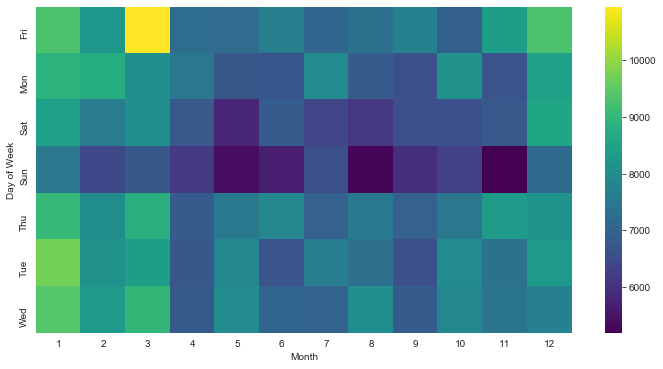

In [85]:
plt.figure(figsize = (12, 6))
sns.heatmap(dayMonth, cmap = 'viridis')

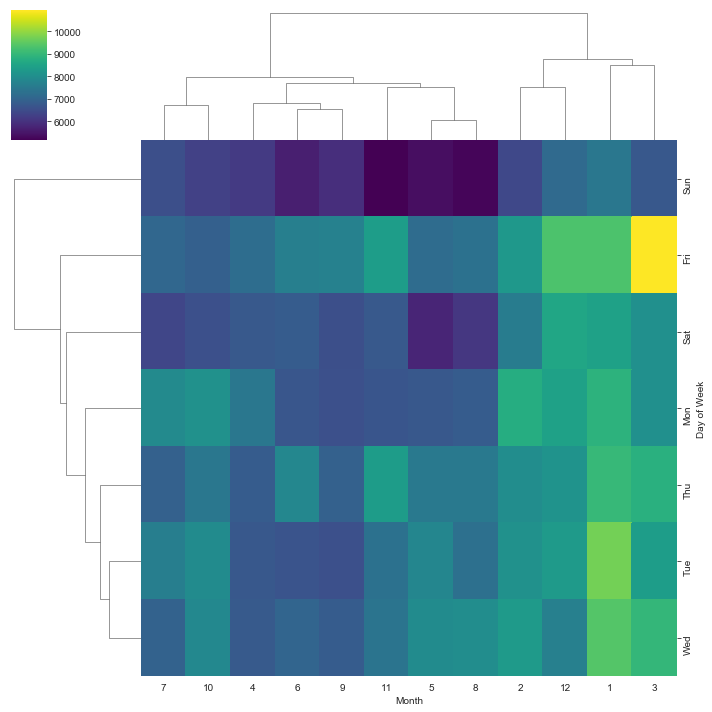

In [40]:
sns.clustermap(dayMonth, cmap = 'viridis')